## CNN Classification Load Maori Symbols Dataset

In [223]:
import tensorflow as tf
import numpy as np 

In [224]:
#Load Maori Symbols Dataset
dataset=np.load('Dataset.npz')
print(dataset.files)

['data', 'labels']


## Explore Dataset

In [225]:
#Explore Dataset
print(dataset['data'].shape)
print(dataset['labels'].shape)

(907, 128, 128, 1)
(907,)


## Get Features and Labels from Dataset

In [226]:
#Get Features from Dataset
Features=dataset['data']
#Get Labels from Dataset
Labels=dataset['labels']

## Add Class Name

In [227]:
#Add Class Name
class_names = ['Fish Hook', 'Warrior Culture', 'First Man', 'Dolphin', 'Sea Turtle',
               'Spiral', 'Spiritual Guardian', 'Hammerhead Shark', 'Fish Hook', 'Weapon',
               'Tear Drop','Bat','Single Twist','Double Twist','Triple Twist','Circle',
               'Adze','Whale Tale']

## Visualise Dataset

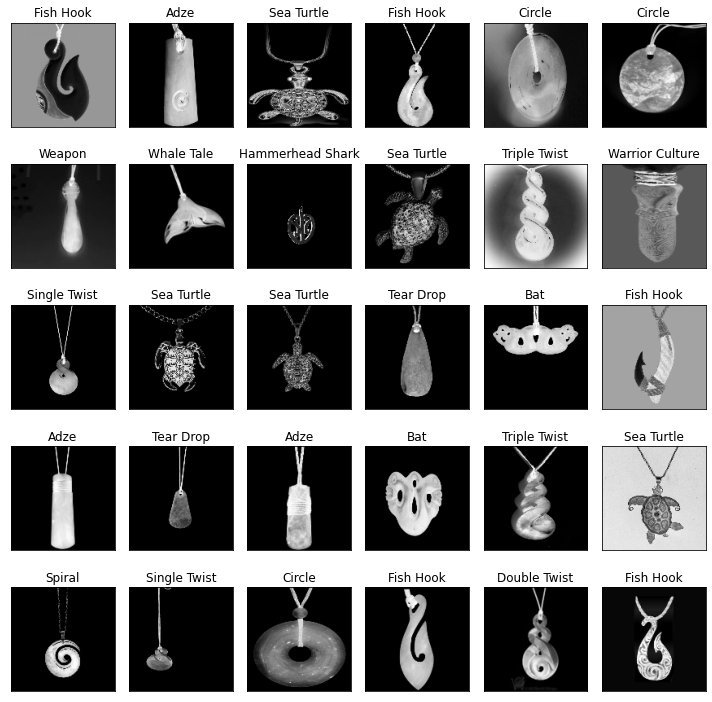

In [228]:
# Visualise Dataset
import matplotlib.pyplot as plt
figures, axes = plt.subplots(nrows=5, ncols=6, figsize=(10,10))
for item in zip(axes.flatten(), Features, Labels): 
    axes, image, target = item  
    axes.imshow(image, cmap=plt.cm.gray_r)  
    axes.set_xticks([])  # remove x-axis tick marks  
    axes.set_yticks([])  # remove y-axis tick marks  
    axes.set_title(class_names[target])
plt.tight_layout()
plt.show()

## Create CNN Model

In [229]:
# Split Datast into Training and Testing, Reshape Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features.reshape(Features.shape[0],128,128,order="C"), Labels.reshape(-1,), train_size=0.8,test_size=0.2,shuffle=False)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(725, 128, 128) (182, 128, 128) (725,) (182,)


In [230]:
# Reshpare Train Data
print(X_train.shape)
shape_list = list(X_train.shape)
shape_list.append(1)
X_train = X_train.reshape(tuple(shape_list))
print(X_train.shape)
print(y_train.shape)

(725, 128, 128)
(725, 128, 128, 1)
(725,)


In [231]:
# Reshape Test Data
print(X_test.shape)
shape_list = list(X_test.shape)
shape_list.append(1)
X_test = X_test.reshape(tuple(shape_list))
print(X_test.shape)
print(y_train.shape)

(182, 128, 128)
(182, 128, 128, 1)
(725,)


In [232]:
# Normalizing Image Data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [233]:
# One-Hot Encoding: Converting the Labels from Integers to Categorical Data
from tensorflow.keras.utils import to_categorical
# Train data
y_train = to_categorical(y_train)
# Test data
y_test = to_categorical(y_test)
shape_list.pop(0)

182

In [234]:
from tensorflow.keras.models import Sequential
## Define CNN Model
cnn = Sequential()

In [235]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Activation
# Define Model Architecture
cnn.add(Conv2D(filters=32, kernel_size=(3,3),padding='same', activation='relu', input_shape=tuple(shape_list)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(filters=64, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(filters=128, kernel_size=(3,3),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.3))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dropout(0.4))
cnn.add(Dense(units=18, activation='softmax'))

cnn.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 16, 16, 128)     

In [236]:
# Compile CNN model
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [237]:
print(X_train.shape)
print(y_train.shape)

(725, 128, 128, 1)
(725, 18)


In [238]:
# Train Model
cnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test,y_test))


Epoch 1/50
23/23 [==============================] - 6s 255ms/step - loss: 3.1418 - accuracy: 0.0497 - val_loss: 2.8907 - val_accuracy: 0.0604
Epoch 2/50
23/23 [==============================] - 6s 256ms/step - loss: 2.8405 - accuracy: 0.1255 - val_loss: 2.6846 - val_accuracy: 0.2033
Epoch 3/50
23/23 [==============================] - 6s 255ms/step - loss: 2.4919 - accuracy: 0.2607 - val_loss: 2.6155 - val_accuracy: 0.2802
Epoch 4/50
23/23 [==============================] - 6s 253ms/step - loss: 2.0697 - accuracy: 0.3931 - val_loss: 2.0048 - val_accuracy: 0.4121
Epoch 5/50
23/23 [==============================] - 6s 259ms/step - loss: 1.7149 - accuracy: 0.4993 - val_loss: 1.8651 - val_accuracy: 0.3956
Epoch 6/50
23/23 [==============================] - 6s 254ms/step - loss: 1.4123 - accuracy: 0.5628 - val_loss: 1.7057 - val_accuracy: 0.5055
Epoch 7/50
23/23 [==============================] - 6s 253ms/step - loss: 1.1419 - accuracy: 0.6538 - val_loss: 1.8425 - val_accuracy: 0.4780
Epoch 

## Evaluate CNN Model

In [239]:
# Evaluate CNN Model
loss, accuracy = cnn.evaluate(X_test, y_test)

6/6 [==============================] - 0s 66ms/step - loss: 3.4044 - accuracy: 0.5934


## Save CNN Model

In [240]:
# Save a model into Hierarchical Daa Format HDF5
cnn.save('CNNModel.h5')